<a href="https://colab.research.google.com/github/ayushkumar75490/Iris-Detection-/blob/main/Iris_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
from tensorflow import keras

In [ ]:
df= pd.read_csv('/content/Irisdataset.csv')
print(df.head(20))
print("lenght of iris dataset : ",len(df))

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5           0.1  Iris-setosa
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
print(df['Species'])  # df[row][col]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
from sklearn.preprocessing import LabelEncoder   # it is used to convert categorical labels (text-based values) into numerical format.
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # you use fit_transform() on training data and transform() on test data to ensure consistency.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
species_name = le.classes_  # classes_ is an attribute of labelEncoder in scikit learn
#it stores unique class labels that encoder has learned.
print(species_name)

[0 1 2]


In [ ]:
X = df.drop(columns=['Id', 'Species'])    # drop() = removes specific columns
y = df['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


**train_test_split**
This section of the code is crucial for preparing your data for machine learning model training and evaluation. It utilizes the train_test_split function from the sklearn.model_selection module to divide your dataset into separate training and testing sets.

**from sklearn.model_selection import train_test_split**

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)
Use code with caution
Here's a breakdown of what each part does:

**from sklearn.model_selection import train_test_split:**
 This line imports the train_test_split function. This function is a standard tool in machine learning for splitting data.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69): This line performs the actual data splitting.

**X:**
This represents your feature data (the independent variables).

**y:**
This represents your target data (the dependent variable or the variable you are trying to predict).

**test_size**=0.3:
This parameter specifies the proportion of the dataset to be allocated to the testing set. In this case, 30% of the data will be used for testing, and the remaining 70% will be used for training. [1]

**shuffle=True:** This ensures that the data is shuffled before splitting. This is important to prevent any ordering in your data from affecting the training and testing sets.

**random_state=69:**
This parameter sets a seed for the random number generator. Using a specific **random_state** ensures that the splitting is reproducible. If you run the code again with the same random_state, you will get the exact same train and test splits.
After this line executes, you will have four new variables:


**x_train:**
The features for the training set.
**x_test:**
 The features for the testing set.
**y_train: **
The target values for the training set.
**y_test:**
The target values for the testing set.
The training set **(x_train, y_train)** will be used to train your machine learning model, and the testing set **(x_test, y_test)** will be used to evaluate how well your trained model performs on unseen data. This split is essential for getting a realistic estimate of your model's performance.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [ ]:
x_train.shape

(105, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler    #StandardScaler – Standardizes features by removing the mean and scaling to unit variance.
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 2s - 452ms/step - accuracy: 0.3619 - loss: 1.0859
Epoch 2/100
4/4 - 0s - 12ms/step - accuracy: 0.3429 - loss: 1.1161
Epoch 3/100
4/4 - 0s - 15ms/step - accuracy: 0.5810 - loss: 0.9850
Epoch 4/100
4/4 - 0s - 14ms/step - accuracy: 0.5714 - loss: 0.9739
Epoch 5/100
4/4 - 0s - 16ms/step - accuracy: 0.6762 - loss: 0.8830
Epoch 6/100
4/4 - 0s - 13ms/step - accuracy: 0.5524 - loss: 0.9415
Epoch 7/100
4/4 - 0s - 14ms/step - accuracy: 0.6286 - loss: 0.8558
Epoch 8/100
4/4 - 0s - 14ms/step - accuracy: 0.6571 - loss: 0.8562
Epoch 9/100
4/4 - 0s - 15ms/step - accuracy: 0.6857 - loss: 0.8141
Epoch 10/100
4/4 - 0s - 15ms/step - accuracy: 0.6571 - loss: 0.8288
Epoch 11/100
4/4 - 0s - 14ms/step - accuracy: 0.7905 - loss: 0.7131
Epoch 12/100
4/4 - 0s - 15ms/step - accuracy: 0.7238 - loss: 0.7333
Epoch 13/100
4/4 - 0s - 14ms/step - accuracy: 0.7714 - loss: 0.6810
Epoch 14/100
4/4 - 0s - 12ms/step - accuracy: 0.7905 - loss: 0.6664
Epoch 15/100
4/4 - 0s - 15ms/step - accuracy: 0.7333 - l

In [ ]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[9.9992698e-01 1.2812033e-05 6.0193190e-05]
 [7.9021119e-03 9.1851759e-01 7.3580347e-02]
 [9.9968648e-01 1.0713559e-04 2.0643127e-04]
 [3.4869596e-04 1.8899381e-02 9.8075193e-01]
 [9.9952632e-01 1.7808781e-04 2.9553054e-04]]


In [ ]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [ ]:

print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [ ]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.722222222222214, 0.5, 'actual')

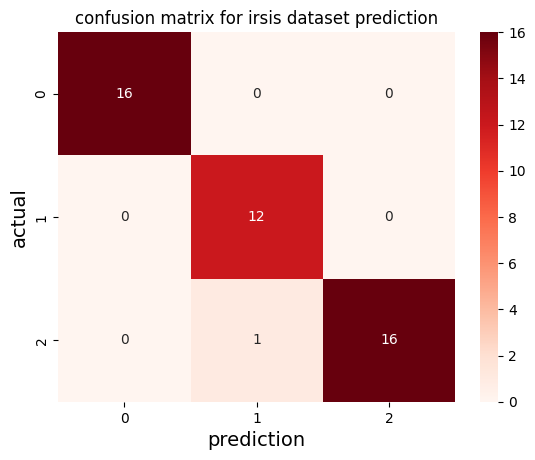

In [ ]:
ax = sb.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)